In [1]:
import math
import numpy as np
from numpy import *
import random
from random import sample
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [2]:
#Q1: Generating the Gaussians to sample data
#############################################
def generateClasses(mean1, mean2, var,init_theta):
    data_set1 = np.random.normal(mean1,var,(20,2)) #let this belong to class 0
    plt.scatter(data_set1[:,0],data_set1[:,1],color = "magenta")


    data_set2 = np.random.normal(mean2,var,(20,2)) #let this belong to class 1
    plt.scatter(data_set2[:,0],data_set2[:,1], color = "lime")

    x2 = []#this is used to calculate the decision boundary line
    full_data  = np.concatenate((data_set1,data_set2),axis=0)
    
    for i in range(len(full_data)):
        x2 += [(-1*init_theta[1])/(init_theta[2])*full_data[i] + (-1*init_theta[0]/init_theta[2])]

    plt.plot(full_data,x2,color = "blue")
    plt.show()
  
    
    return data_set1,data_set2,full_data



[-0.29056173  0.47842861 -0.35723151]


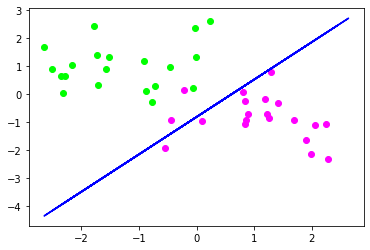

class 1:
[[ 1.68648771 -0.9246615 ]
 [ 1.89790856 -1.64108115]
 [-0.5521598  -1.9107503 ]
 [ 1.41260623 -0.31526554]
 [ 1.2970522   0.78406166]
 [ 0.89498191 -0.69388234]
 [ 1.98220314 -2.14027091]
 [ 1.26177246 -0.84872208]
 [ 1.21593827 -0.71413333]
 [ 0.83490969 -1.07402694]
 [ 2.2382496  -1.07312733]
 [ 1.18409463 -0.16086643]
 [-0.44694546 -0.93539753]
 [ 2.04936837 -1.11628933]
 [ 2.28843664 -2.30121442]
 [ 0.83198321 -0.23660715]
 [-0.21399542  0.15495118]
 [ 0.80075559  0.06434178]
 [ 0.09120498 -0.94836947]
 [ 0.86497254 -0.92940159]]
class2:
[[-0.46510942  0.98534849]
 [-2.36045094  0.65144525]
 [-0.77619247 -0.26696025]
 [ 0.22762245  2.6366986 ]
 [-0.02431108  2.38593586]
 [-2.31661444  0.04663266]
 [-1.52151538  1.33036452]
 [-2.16809533  1.04430029]
 [-2.64394492  1.69463698]
 [-1.77562438  2.44945383]
 [-2.50227408  0.88882457]
 [-0.7150129   0.29680449]
 [-2.27620581  0.66626176]
 [-1.72535465  1.42058839]
 [-0.00765025  1.31861182]
 [-0.90598802  1.20008935]
 [-1.71063

In [3]:
#generate random values for our parameters theta
init_theta = np.random.uniform(-0.5,0.5,3) #since data is 2d we need 3 parameters
print(init_theta)

mean1 = (1,-1)
mean2 = (-1,1)
var = (1,1)

class1,class2,full_data = generateClasses(mean1, mean2, var,init_theta)
print("class 1:")
print(class1)

print("class2:")
print(class2)

In [4]:
#trying to calculate an error using log likelihood
error = 1.0
class_y = np.zeros(shape=(len(full_data),1)) # here we are assigning the class values to the datapoints

for i in range(len(full_data)):
    if (full_data[i] in class1):
        class_y[i] = 0
    else:
        class_y[i] = 1
    print(str(full_data[i])+" has class: "+str(class_y[i]))
    
def h_function(theta, x):
    aug_x = np.concatenate((np.array([1]),x))

    exponent = np.dot(np.transpose(theta),aug_x)

    
    result = 1/(1+math.exp(-1*exponent))
    
    return(result)
    
def likelihood(init_theta,full_data,class_y):
    result = 0
    for i in range(len(full_data)):
        result += class_y[i]*math.log(h_function(init_theta,full_data[i])) + (1-class_y[i])*math.log(1-h_function(init_theta,full_data[i]))
        
    return result

print("error using log likelihood is:" + str(likelihood(init_theta,full_data,class_y)))

[ 1.68648771 -0.9246615 ] has class: [0.]
[ 1.89790856 -1.64108115] has class: [0.]
[-0.5521598 -1.9107503] has class: [0.]
[ 1.41260623 -0.31526554] has class: [0.]
[1.2970522  0.78406166] has class: [0.]
[ 0.89498191 -0.69388234] has class: [0.]
[ 1.98220314 -2.14027091] has class: [0.]
[ 1.26177246 -0.84872208] has class: [0.]
[ 1.21593827 -0.71413333] has class: [0.]
[ 0.83490969 -1.07402694] has class: [0.]
[ 2.2382496  -1.07312733] has class: [0.]
[ 1.18409463 -0.16086643] has class: [0.]
[-0.44694546 -0.93539753] has class: [0.]
[ 2.04936837 -1.11628933] has class: [0.]
[ 2.28843664 -2.30121442] has class: [0.]
[ 0.83198321 -0.23660715] has class: [0.]
[-0.21399542  0.15495118] has class: [0.]
[0.80075559 0.06434178] has class: [0.]
[ 0.09120498 -0.94836947] has class: [0.]
[ 0.86497254 -0.92940159] has class: [0.]
[-0.46510942  0.98534849] has class: [1.]
[-2.36045094  0.65144525] has class: [1.]
[-0.77619247 -0.26696025] has class: [1.]
[0.22762245 2.6366986 ] has class: [1.]


In [5]:
def cost_func(theta,x):

    aug_x =np.concatenate((np.array([1]),x))

    result = 0
    for i in range(len(theta)):
        result += theta[i]*aug_x[i]
    
    cost = 1/(1+math.exp(-1*result))
    return cost
    

In [6]:
#now perform gradient decsent on the current parameters DOUBLE CHECK
error = 10
tol = 0.005
max_iter = 1000
new_theta = init_theta.copy()
alpha = 0.01
counter = 0

while(error >= tol and counter <= max_iter):#check if should be or/and
    for i in range(len(full_data)):
    
       
        data_point = np.concatenate((np.array([1]),full_data[i]))
       
        
        for j in range(len(init_theta)):
            
            new_theta[j] = init_theta[j] + alpha*(class_y[i]-cost_func(init_theta,full_data[i]))*data_point[j]
          
        error = np.linalg.norm(new_theta-init_theta,2)
       
        
        init_theta = new_theta.copy()
        

        
        counter += 1



print("theta calculated after " + str(counter) + " iterations: " + str(new_theta))      
                

theta calculated after 320 iterations: [-0.20111963 -0.78146523  0.64778209]


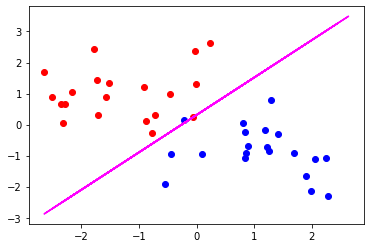

In [7]:
#lets now attempt to plot these new learned parameters
plotted_points = []

for i in range(len(full_data)):
    plotted_points += [(-1*new_theta[1])/(new_theta[2])*full_data[i] + (-1*new_theta[0]/new_theta[2])]
    
plt.plot(full_data,plotted_points, color = "magenta")
plt.scatter(class1[:,0],class1[:,1],color = "b")
plt.scatter(class2[:,0],class2[:,1],color = "r")
plt.show()

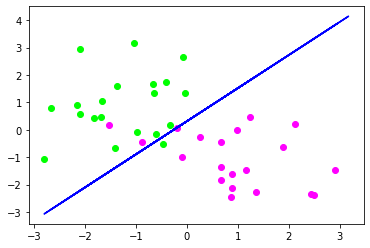

In [8]:
#Lets now generate a set of validation data
###############################################################################

valid_class1,valid_class2,valid_full_data = generateClasses(mean1, mean2, var,new_theta)


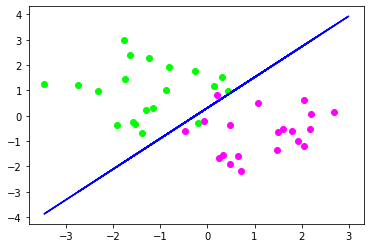

In [9]:
#Lets now test our model against a third set of data (Testing data)
###############################################################################
valid_class1,valid_class2,valid_full_data = generateClasses(mean1, mean2, var,new_theta)
